# Lab Four: Multi-Layer Perceptron


### Skyler Tran, Taylor Slaton

In [35]:
print("This is Taylor checking in")
print("Skyler")

This is Taylor checking in
Skyler


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn


In [37]:
# Mount google drive folder
# This will prompt for authorization.

from google.colab import drive
drive.mount('/content/drive')

# Read in data from csv and put in pandas

raw_data = pd.read_csv('/content/drive/My Drive/ML_Spring2020/Lab4/lab4_dataset.csv')

# raw_data = pd.read_csv('./lab4_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# View content in folder
!ls "/content/drive/My Drive/ML_Spring2020/Lab4"

lab4_dataset.csv  Lab4.ipynb


## Load, Split, and Balance ***(15 points)***

### ***5 points***
Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the variables until asked to do so.  Remove any observations that having missing data. Encode any string data as integers for now. 


*Comment from student: I have removed rows that have missing data and ended up with 72718 entries.*

In [0]:
# code here

In [40]:
# Read in data from csv and put in pandas
from sklearn.preprocessing import LabelEncoder

raw_data = pd.read_csv('/content/drive/My Drive/ML_Spring2020/Lab4/lab4_dataset.csv')

true_raw_data = pd.read_csv('/content/drive/My Drive/ML_Spring2020/Lab4/lab4_dataset.csv')
# Remove two columns
raw_data = raw_data.drop(columns=['TractId', 'County'])
true_raw_data = true_raw_data.drop(columns=['TractId', 'County'])

# Getting unique states before label encoding them
state = raw_data['State'].unique()

state_label = [x for x in range(len(state))]

LE = LabelEncoder()
raw_data['State'] = LE.fit_transform(raw_data['State'])

# raw_data = raw_data.astype('float64').dtypes
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  int64  
 12  IncomeErr         72718 non-null  int64  
 13  IncomePerCap      72718 non-null  int64  
 14  IncomePerCapErr   72718 non-null  int64  
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float6

### ***5 points***
Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing.

In [0]:
# code here

In [0]:
# divide training / testing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X_train, X_test, Y_train, Y_test = train_test_split(raw_data, raw_data['ChildPoverty'], test_size=0.20)

### ***5 points***
Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

In [43]:
print(Y_train.value_counts())
print(Y_test.value_counts())
print(X_train.shape)
print(X_test.shape)

0.0     3896
2.0      227
2.2      223
2.4      212
1.3      212
        ... 
92.8       1
90.9       1
93.2       1
84.4       1
94.6       1
Name: ChildPoverty, Length: 951, dtype: int64
0.0     990
2.7      60
1.7      59
1.2      58
2.6      57
       ... 
95.9      1
85.6      1
89.5      1
75.8      1
88.8      1
Name: ChildPoverty, Length: 841, dtype: int64
(58174, 35)
(14544, 35)


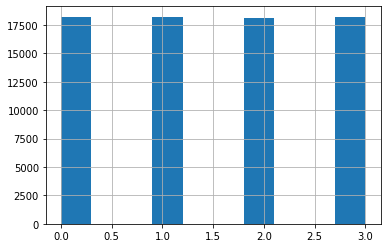

In [44]:
# balance dataset
raw_data['ChildPoverty'] = pd.qcut(raw_data['ChildPoverty'], 4, labels=[0, 
                                                                        1, 
                                                                        2, 
                                                                        3])

raw_data['ChildPoverty'].hist()

*We used pandas.qcut because it is meant to create equal sized buckets based on sample quantiles. This works for what we wanted this method to do. It allowed for an equal distribution.*

In [60]:
sub_dataset = raw_data.drop(columns=['ChildPoverty'])
X_train, X_test, Y_train, Y_test = train_test_split(sub_dataset.values,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

print(sub_dataset.values)
print(raw_data['ChildPoverty'].values)


[[0.000e+00 1.845e+03 8.990e+02 ... 4.500e+00 0.000e+00 4.600e+00]
 [0.000e+00 2.172e+03 1.167e+03 ... 9.000e+00 0.000e+00 3.400e+00]
 [0.000e+00 3.385e+03 1.533e+03 ... 4.800e+00 7.000e-01 4.700e+00]
 ...
 [3.900e+01 2.218e+03 1.001e+03 ... 8.000e+00 0.000e+00 2.300e+01]
 [3.900e+01 4.380e+03 1.964e+03 ... 1.900e+00 0.000e+00 2.950e+01]
 [3.900e+01 3.001e+03 1.343e+03 ... 5.000e+00 0.000e+00 1.790e+01]]
[2, 3, 2, 0, 2, ..., 3, 3, 3, 3, 3]
Length: 72718
Categories (4, int64): [0 < 1 < 2 < 3]


*Balancing should be done on this dataset, as there are large percentage differences between the possible answers. When there is a large difference in percentage of the data, it makes sense to balance the data so that it comes out more accurate. Otherwise, the system can encouter inaccurate classification due to a lack of a specific dataset within each bucket.*



## Pre-Processing ***(25 points)***

### ***5 points***
Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.

In [0]:
# code here

In [0]:
from scipy.special import expit
import sys
# from class example
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term


In [0]:
# from class example
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

In [0]:
# This is original data
dataframe1 = raw_data.drop(columns=['ChildPoverty'])
X_train, X_test, Y_train, Y_test = train_test_split(dataframe1.values,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

In [67]:
from sklearn.metrics import accuracy_score

params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.0000001,  # learning rate
              random_state=1)

nn = TwoLayerPerceptron(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.3595984598459846


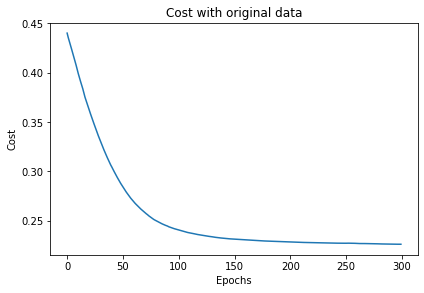

In [51]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("Cost with original data")
plt.show()

### ***5 points***
Now normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

In [0]:
# code here

In [79]:
from sklearn import preprocessing
dataframe2 = raw_data.drop(columns = ["ChildPoverty", "State"]) 
# Because "State" will be used for one hot encoded

min_max_scaler = preprocessing.MinMaxScaler()
dataframe2_min_max = min_max_scaler.fit_transform(dataframe2.values)

# MinMaxScaler normalize
X_train, X_test, Y_train, Y_test = train_test_split(dataframe2_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = TwoLayerPerceptron(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.24023652365236522


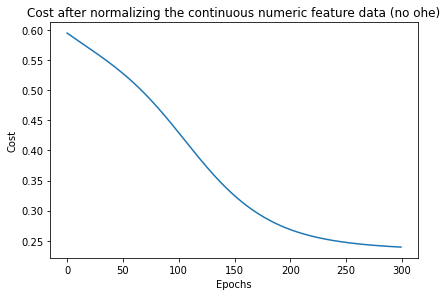

In [80]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("Cost after normalizing the continuous numeric feature data (no ohe)")
plt.show()

### ***5 points***
Now normalize the continuous numeric feature data AND one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 

In [0]:
# code here

In [83]:
# One hot encode
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# instantiate OneHotEncoder
ohe = OneHotEncoder() 

# ohe_dataframe_state = pd.DataFrame(ohe.fit_transform(temp_data[['State']]).toarray()) 
# dataframe3 = raw_data.join(ohe_dataframe_state)
# OR
# dataframe3 = pd.get_dummies(true_raw_data, columns=["State"], prefix=["state"]

dataframe3 = pd.get_dummies(true_raw_data, columns=["State"], prefix=["state"])

# MinMaxScaler normalize
min_max_scaler = preprocessing.MinMaxScaler()
dataframe3_min_max = min_max_scaler.fit_transform(dataframe3.values)
print(dataframe3_min_max)

X_train, X_test, Y_train, Y_test = train_test_split(dataframe3_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = TwoLayerPerceptron(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

[[0.02729494 0.02707816 0.02765157 ... 0.         0.         0.        ]
 [0.0322896  0.03539082 0.02942681 ... 0.         0.         0.        ]
 [0.05081717 0.04674318 0.05491199 ... 0.         0.         0.        ]
 ...
 [0.03299221 0.03024194 0.03580563 ... 0.         0.         0.        ]
 [0.06601497 0.06011166 0.07188205 ... 0.         0.         0.        ]
 [0.04495189 0.04084988 0.04907477 ... 0.         0.         0.        ]]


Epoch: 300/300


Accuracy: 0.24979372937293728


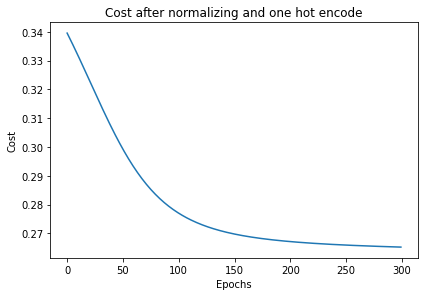

In [82]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("Cost after normalizing and one hot encode")
plt.show()

### ***10 points***
Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  

In [0]:
# code here

In Class Two-Layer Perceptron: 
- This example ended up with an accuracy of around 36%

With normalized continuous numeric feature data:
- This example ended up with an accuracy of around 24%

With one hot encoded categorical data:
- This example ended up with an accuracy of around 25%

The Two Layer Perceptron worked better without continuous numeric feature data than with it, but without this continuous data the cost for each epoch increased from 0.38 at the start to 0.45. This cost, however, decreases faster without continuous data as the number of epochs continues. There is also a much nicer, smoother decent for noncontinuous data. With the continuous numeric feature data, the cost graph is very shaky and seems almost unstable, but is still in the same generic shape. 

The original class example has the best accuracy at 35%, with a steep decent lowering cost from 0.45 to 0.25.
Normalization has the worst accuracy at around 17%, with a smooth curve down in cost, indicating a higher cost. It starts around 0.6 and eventually also goes down to 0.25.
Once you add one hot encoding, the accuracy goes up to 25% with a steep decent lowering costs, but these costs are between 0.34 and 0.27.
The original in class example works best.

**NOTE: Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.**

## Modeling ***50 points***

### ***10 points***
Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch. Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

In [0]:
# code here

In [0]:
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=60,n_hidden_2=50, n_hidden_3 = 40, n_hidden_4 = 30,
                 n_hidden_5 = 20,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.n_hidden_4 = n_hidden_4
        self.n_hidden_5 = n_hidden_5

        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden_1 + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden_1 + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        sigma3 = -2*(Y_enc-A3)*A3*(1-A3)
        sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

        
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

In [111]:
params = dict(C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.0000001,  # learning rate
              random_state=1)

X_train, X_test, Y_train, Y_test = train_test_split(dataframe3_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = TwoLayerPerceptronBase(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.3010863586358636


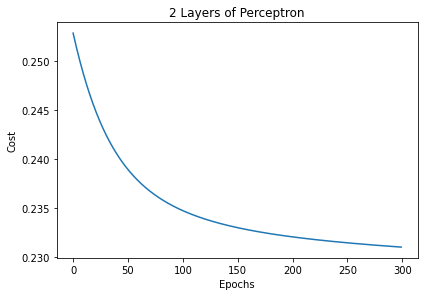

In [112]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("2 Layers of Perceptron")
plt.show()

In [0]:
class ThreeLayerPerceptronBase(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0,size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) 

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden_2 + 1)

        return W1, W2, W3

    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2 
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
   
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc,W1, W2, W3):
        sigma3 = (A4-Y_enc)
        sigma2 = (W3.T @ sigma3)*A3*(1-A3)
        sigma1 = (W2.T @ sigma2[1:,:])*A2*(1-A2)
        
        grad1 = sigma1[1:,:] @ A1
        grad2 = sigma2[1:,:] @ A2.T
        grad3 = sigma3 @ A3.T
        
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C   
        
        return grad1, grad2, grad3
   
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        return (lambda_/3) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc, W1, W2, W3):
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        
        return y_pred

    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()
        
        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape) 
        delta_W3_prev = np.zeros(self.W3.shape) 

        self.cost_ = []
        self.score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
            # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                               self.W1,
                                                               self.W2,
                                                               self.W3,
                                                               )
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,
                                                         Z1=Z1, Z2=Z2, Z3=Z3,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1, W2=self.W2, W3=self.W3)

                delta_W1, delta_W2, delta_W3 = self.eta * grad1, self.eta * grad2, self.eta * grad3
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev)) # update with momentum
                self.W3 -= (delta_W3 + (self.alpha * delta_W3_prev)) # update with momentum

                delta_W1_prev, delta_W2_prev, delta_W3_prev = delta_W1, delta_W2, delta_W3

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self

In [157]:
params = dict(C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.0000001,  # learning rate
              random_state=1)

X_train, X_test, Y_train, Y_test = train_test_split(dataframe3_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = ThreeLayerPerceptronBase(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.3105060506050605


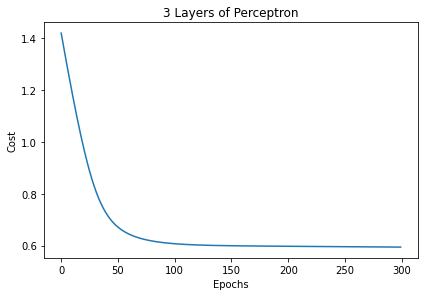

In [158]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("3 Layers of Perceptron")
plt.show()

### ***10 points***
Repeat the previous step, adding support for a fourth layer.

In [0]:
# code here

In [0]:
class FourLayerPerceptronBase(ThreeLayerPerceptronBase):
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0,size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) 

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0,size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) 

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden_3 + 1)

        return W1, W2, W3, W4
    
    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2 
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
   
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2,Z3,Z4, Y_enc, W1, W2, W3,W4):
      """ Compute gradient step using backpropagation.
      """
      sigma4 = (A5-Y_enc)
      sigma3 = (W4.T @ sigma4)*A4*(1-A4)
      sigma2 = (W3.T @ sigma3[1:,:])*A3*(1-A3)
      sigma1 = (W2.T @ sigma2[1:,:])*A2*(1-A2)

      grad1 = sigma1[1:,:] @ A1
      grad2 = sigma2[1:,:] @ A2.T
      grad3 = sigma3[1:,:] @ A3.T
      grad4 = sigma4 @ A4.T

      grad1[:, 1:] += W1[:, 1:] * self.l2_C
      grad2[:, 1:] += W2[:, 1:] * self.l2_C
      grad3[:, 1:] += W3[:, 1:] * self.l2_C
      grad4[:, 1:] += W4[:, 1:] * self.l2_C

      return grad1, grad2, grad3,grad4

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        return (lambda_/3) * np.sqrt(np.mean(W1[:, 1:] ** 2) + 
                                     np.mean(W2[:, 1:] ** 2) + 
                                     np.mean(W3[:, 1:] ** 2) +
                                     np.mean(W4[:, 1:] ** 2)
                                     )
    
    def _cost(self,A5,Y_enc, W1, W2, W3, W4):
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5)+(1-Y_enc)*np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 = self._initialize_weights()
        
        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape) 
        delta_W3_prev = np.zeros(self.W3.shape) 
        delta_W4_prev = np.zeros(self.W4.shape) 

        self.cost_ = []
        self.score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
            # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                               self.W1,
                                                               self.W2,
                                                               self.W3,
                                                               self.W4,
                                                               )
                
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3, self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3,grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5,
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)

                delta_W1, delta_W2, delta_W3, delta_W4 = self.eta * grad1, self.eta * grad2, self.eta * grad3, self.eta * grad4
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev)) # update with momentum
                self.W3 -= (delta_W3 + (self.alpha * delta_W3_prev)) # update with momentum
                self.W4 -= (delta_W4 + (self.alpha * delta_W4_prev)) # update with momentum

                delta_W1_prev, delta_W2_prev, delta_W3_prev, delta_W4_prev = delta_W1, delta_W2, delta_W3, delta_W4

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self

In [162]:
params = dict(C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.0000001,  # learning rate
              random_state=1)

X_train, X_test, Y_train, Y_test = train_test_split(dataframe3_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = FourLayerPerceptronBase(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.27323982398239827


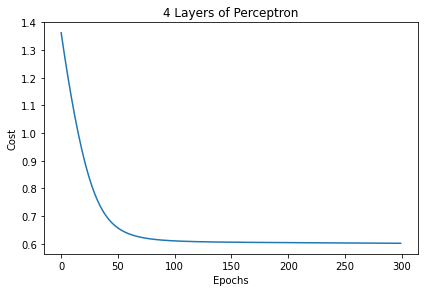

In [163]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("4 Layers of Perceptron")
plt.show()

### ***10 points***
Repeat the previous step, adding support for a fifth layer. 

In [0]:
# code here

In [0]:
class FiveLayerPerceptronBase(FourLayerPerceptronBase):
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0,size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) 

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0,size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) 

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_hidden_4
        W4 = np.random.uniform(-1.0, 1.0,size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden_4, self.n_hidden_3 + 1) 

        W5_num_elems = (self.n_hidden_4 + 1)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden_4 + 1)

        return W1, W2, W3, W4, W5
    
    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2 
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        A6 = self._sigmoid(Z5)
       

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
   
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
      """ Compute gradient step using backpropagation.
      """
      sigma5 = (A6-Y_enc)
      sigma4 = (W5.T @ sigma5)*A5*(1-A5)
      sigma3 = (W4.T @ sigma4[1:,:])*A4*(1-A4)
      sigma2 = (W3.T @ sigma3[1:,:])*A3*(1-A3)
      sigma1 = (W2.T @ sigma2[1:,:])*A2*(1-A2)

      grad1 = sigma1[1:,:] @ A1
      grad2 = sigma2[1:,:] @ A2.T
      grad3 = sigma3[1:,:] @ A3.T
      grad4 = sigma4[1:,:] @ A4.T
      grad5 = sigma5 @ A5.T

      grad1[:, 1:] += W1[:, 1:] * self.l2_C
      grad2[:, 1:] += W2[:, 1:] * self.l2_C
      grad3[:, 1:] += W3[:, 1:] * self.l2_C
      grad4[:, 1:] += W4[:, 1:] * self.l2_C
      grad5[:, 1:] += W5[:, 1:] * self.l2_C

      return grad1, grad2, grad3,grad4, grad5
   
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        return (lambda_/3) * np.sqrt(np.mean(W1[:, 1:] ** 2) + 
                                     np.mean(W2[:, 1:] ** 2) + 
                                     np.mean(W3[:, 1:] ** 2) +
                                     np.mean(W4[:, 1:] ** 2) + 
                                     np.mean(W5[:, 1:] ** 2)
                                     )
    
    def _cost(self,A6,Y_enc, W1, W2, W3, W4, W5):
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()
        
        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape) 
        delta_W3_prev = np.zeros(self.W3.shape) 
        delta_W4_prev = np.zeros(self.W4.shape) 
        delta_W5_prev = np.zeros(self.W5.shape) 

        self.cost_ = []
        self.score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
            # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                               self.W1,
                                                               self.W2,
                                                               self.W3,
                                                               self.W4,
                                                               self.W5
                                                               )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6,
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

                delta_W1, delta_W2, delta_W3, delta_W4, delta_W5 = self.eta * grad1, self.eta * grad2, self.eta * grad3, self.eta * grad4, self.eta * grad5
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev)) # update with momentum
                self.W3 -= (delta_W3 + (self.alpha * delta_W3_prev)) # update with momentum
                self.W4 -= (delta_W4 + (self.alpha * delta_W4_prev)) # update with momentum
                self.W5 -= (delta_W5 + (self.alpha * delta_W5_prev)) # update with momentum

                delta_W1_prev, delta_W2_prev, delta_W3_prev, delta_W4_prev, delta_W5_prev = delta_W1, delta_W2, delta_W3, delta_W4, delta_W5

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self
    

In [173]:
params = dict(C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.0000001,  # learning rate
              random_state=1)

X_train, X_test, Y_train, Y_test = train_test_split(dataframe3_min_max,
                                                    raw_data['ChildPoverty'].values,
                                                    test_size=0.20)

nn = FiveLayerPerceptronBase(**params)

nn.fit(X_train, Y_train, print_progress=50)
yhat = nn.predict(X_test)
print('\nAccuracy:',accuracy_score(Y_test,yhat))

Epoch: 300/300


Accuracy: 0.20262651265126513


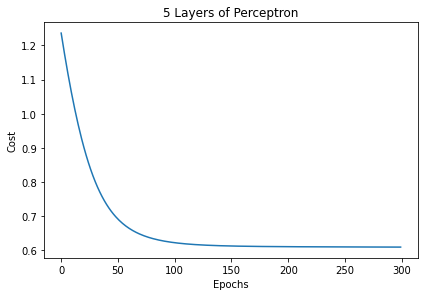

In [174]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title("5 Layers of Perceptron")
plt.show()

### ***20 points***
Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network. Compare the performance of this model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique. 

In [0]:
# code here

*compare performances here*

### ***Exceptional Work (10 points)***
5000 level student: You have free reign to provide additional analyses.
One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance. 

In [0]:
# code here

*Explain here*
